# **Week Six Assignment: Knock Airport Weather**

This assignment plots the following from weather readings in Knock Airport: 
- Temperature 
- Mean Temperature Each Day 
- Mean Temperature for Each Month
- Windspeed 
- Rolling Windspeed (Over 24 Hours)
- Max Windspeed Each Day 
- Monthly Mean of the Daily Max Windspeeds

**Auther: Brianne McGrath**

____

## **Loading Data, Inspection and Filtering**

In [30]:
# import necessary libraries 

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [31]:
# load the data set 

url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
df = pd.read_csv(url, skiprows=23) #skipped top rows with additional information 


C:\Users\brian\AppData\Local\Temp\ipykernel_17324\3204419776.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23) #skipped top rows with additional information


In [32]:
# inspection of data set

df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


___

In [33]:
# keeping what we need 

df_filtered = df[['date','temp', 'wdsp']].copy()
df_filtered.head()

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [34]:
# checking for missing values in windspeed

missing_wdsp = df_filtered[df_filtered['wdsp']==0]
missing_wdsp_count = missing_wdsp.shape[0]
print(missing_wdsp_count)

128


In [40]:
# converting string values - had an error previously 
df_filtered['date'] = df_filtered['date'].apply(
    lambda x: datetime.strptime(x, '%d-%b-%Y %H:%M') if isinstance(x, str) else x
)

# Check the result
df_filtered.head()


,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


___

## **Plotting**

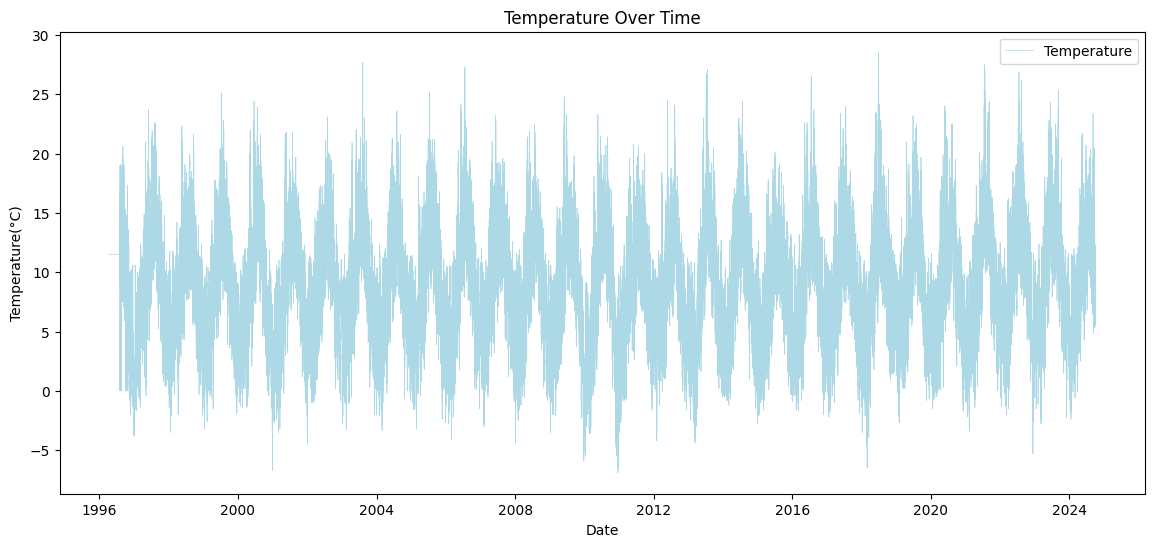

In [46]:
#NEEDS REWORK - MESSY 
plt.figure(figsize=(14,6))
plt.plot(df_filtered['date'], df_filtered['temp'], color='lightblue', linewidth=0.5, label='Temperature') #thinner line might help with visibility
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.legend()
plt.show()

## **References:**
- https://www.javatpoint.com/how-to-skip-rows-while-reading-csv-file-using-pandas (Skipping rows when reading in csv)
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html (Datetime)
- https://stackoverflow.com/questions/52633719/syntax-to-use-df-apply-with-datetime-strptime (Converting String to Date)